# Ramer Douglas Peucker Algorithm
It is used to decimate a curve composed of line segments (also known as polyline).
The algorithm minimizes the distance between the original curve and the simplified curve. The simplified curve consists of a subset of the points that defined the original curve.

## Hausdorff distance
It measures how far two subsets of a metric space are from each other.

## Algorithm
The algorithm starts by defining a tolerance $\epsilon$. Essentially, the algorithm works by discarding any point that is closer than $\epsilon$ to the "reference line".

The reference line is simply the line connecting the starting and end point of the whole set.

If a point is farther from the reference line than $\epsilon$ then it is important enough and must be kept. When deciding to keep it, we effectively divide the set of points in two, thus creating two reference lines to consider.
We continue this way in a divide an conquer fashion, with the following termination criteria:
- The set of points considered only has two points.

Note that if all of the points in the set are closer to the reference line than $\epsilon$, then they are all discarded and we reach the termination criteria.

# Input data
We define our input data as an ordered list of 2D points.

In [2]:
import sys

sys.path.append("../2DProjectiveGeometry")
from geometry import *

def get_data():
    """
    Hand-produce some points
    """
    data = [
        [0, 0],
        [2, 3],
        [3, 2],
        [4, 0],
        [7, 1],
        [9, 2],
        [10, 3],
        [12, 4],
        [13, 2],
        [14, 1],
        [16, 0]
    ]
    return data

data = get_data()
point_set = [InhomogeneousPoint(x) for x in data]


In [3]:
 # See: https://karthaus.nl/rdp/
def DouglasPeucker(point_set, epsilon):
    # Find the point with the maximum distance
    ref_line = Line([0,0,0])
    ref_line.line_from_points(point_set[0], point_set[-1])
    dmax = 0
    imax = 0
    for i, point in enumerate(point_set):
        distance = Utils.distance_line_point(ref_line, point)
        if distance > dmax:
            dmax = distance
            imax = i

    simplified_set = []

    # Divide and conquer
    if (dmax > epsilon) :
        first_set = DouglasPeucker(point_set[:imax+1], epsilon)
        second_set = DouglasPeucker(point_set[imax:], epsilon)

        simplified_set = first_set + second_set
    else: 
        simplified_set = [point_set[0], point_set[-1]]

    return simplified_set

/tmp/ipykernel_114701/1835286784.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


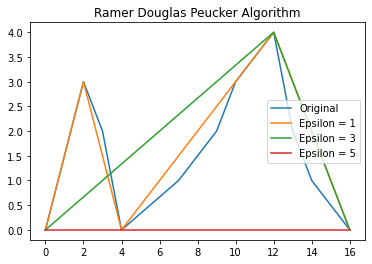

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot([p.vector[0] for p in point_set], [p.vector[1] for p in point_set], label = "Original")

for epsilon in [1, 3, 5]:
    simplified_set = DouglasPeucker(point_set, epsilon)  
    ax1.plot(
        [p.vector[0] for p in simplified_set], 
        [p.vector[1] for p in simplified_set],
        label = f"Epsilon = {epsilon}"
        )
ax1.legend()
ax1.set_title("Ramer Douglas Peucker Algorithm")
fig.show()

/tmp/ipykernel_114701/4161939878.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


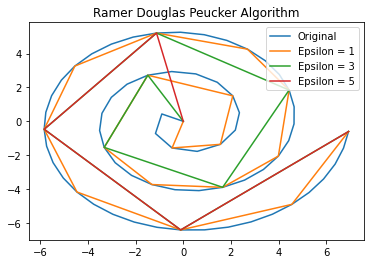

In [13]:
sys.path.append("../Generators")
from generators import *


coils = 3
radius = 7

point_set = [InhomogeneousPoint(x) for x in generate_spiral(coils, radius)]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot([p.vector[0] for p in point_set], [p.vector[1] for p in point_set], label = "Original")

for epsilon in [1, 3, 5]:
    simplified_set = DouglasPeucker(point_set, epsilon)  
    ax1.plot(
        [p.vector[0] for p in simplified_set], 
        [p.vector[1] for p in simplified_set],
        label = f"Epsilon = {epsilon}"
        )
ax1.legend()
ax1.set_title("Ramer Douglas Peucker Algorithm")
fig.show()